In [15]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import seaborn as sns
import pandas_datareader.data as web
%matplotlib inline

## Whale Returns

In [4]:
# Read and clean whale return data
whale_returns_csv = Path("data/whale_returns.csv")
whale_returns_csv = pd.read_csv(whale_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_csv.dropna(inplace=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

In [7]:
# Read and clean algorithmic returns
algo_returns_csv = Path("data/algo_returns.csv")
algo_returns_csv = pd.read_csv(algo_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_csv.dropna(inplace = True)
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns'

In [11]:
# Read and clean S&P 500 Returns
sp500_history_csv = Path("data/sp500_history.csv")
sp500_history_csv = pd.read_csv(sp500_history_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
# Fix Data Type
sp500_history_csv['Close'] = sp500_history_csv['Close'].str.replace(r'$', '').astype(float)
# Calculate Daily Returns
sp500_history_csv['Close'] = sp500_history_csv['Close'].pct_change()
# Drop nulls
sp500_history_csv.dropna(inplace=True)
# Rename Column
sp500_history_csv.rename(columns={"Close": "SP_500"}, inplace=True)
sp500_history_csv.tail()

,SP_500
Date,
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611
2012-10-01,-0.000872


In [20]:
# Read and clean Bitcoin returns
# Get Yahoo Data Function
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2020,5,3)

def get_yahoo_data(symbol, start, end):
    df = web.DataReader(symbol, 'yahoo', start, end)
    df = df.drop(columns=['Open','High', 'Low', 'Volume','Adj Close'])
    df = df.rename(columns={'Close':symbol})
    return(df)
btc = get_yahoo_data("BTC-USD", start, end)
btc_returns = btc.pct_change()
btc_returns.head()

,BTC-USD
Date,
2014-09-16,NaN
2014-09-17,-0.071926
2014-09-18,-0.069843
2014-09-19,0.035735
2014-09-20,-0.024659


## Combine Whale, Algorithmic, S&P 500, and BITCOIN Returns

In [28]:
# Concatenate all DataFrames into a single DataFrame
returns_df = pd.merge(whale_returns_csv, algo_returns_csv, how='left', on=['Date'])
returns_df2 = pd.merge(returns_df,sp500_history_csv, how='left', on=['Date'])
returns_df3 = pd.merge(returns_df2, btc_returns, how='left', on=['Date'])
returns_df2 = returns_df2.rename(columns={"SOROS FUND MANAGEMENT LLC": "SOROS",
                            "PAULSON & CO.INC." : "PAULSON",
                            "TIGER GLOBAL MANAGEMENT LLC": "TIGER",
                            "BERKSHIRE HATHAWAY INC":"BH"})
returns_df3 = returns_df3.rename(columns={"SOROS FUND MANAGEMENT LLC": "SOROS",
                            "PAULSON & CO.INC." : "PAULSON",
                            "TIGER GLOBAL MANAGEMENT LLC": "TIGER",
                            "BERKSHIRE HATHAWAY INC":"BH",
                                         "BTC-USD": "BTC"})
returns_df2.head(10)

,SOROS,PAULSON & CO.INC.,TIGER,BH,Algo 1,Algo 2,SP_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Portfolio Analysis

### Return Performance
    1. Daily Returns
    2. Cumulative Returns
    3. Alpha
    
### Risk Performance
    1. Box Plot
    2. Standard Deviations
    3. Beta
    4. Correlations
    
### Return to Risk Performance
    1. Sharpe Ratio
    

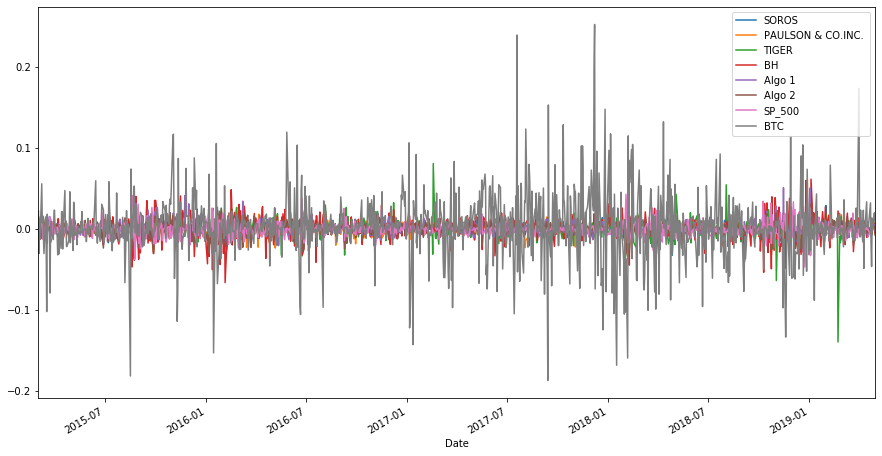

In [29]:
# Plot daily returns with Bitcoin

returns_df3.plot(figsize=[15,8])

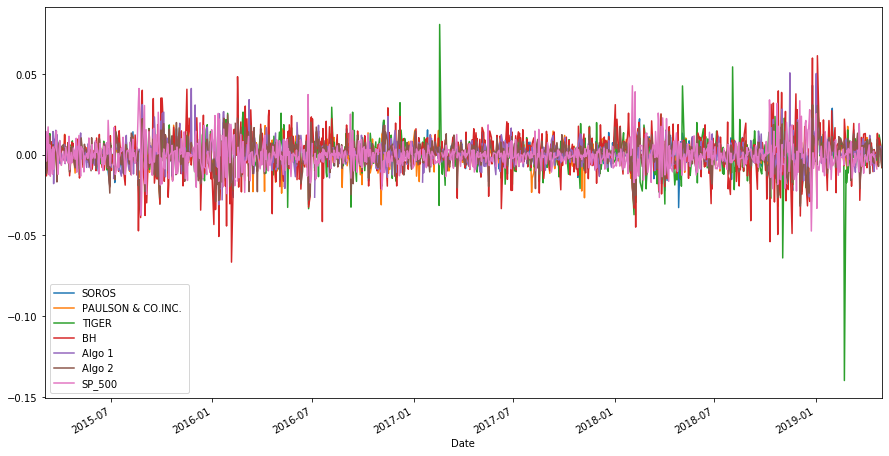

In [30]:
# Plot daily returns w/o Bitcoin

returns_df2.plot(figsize=[15,8])

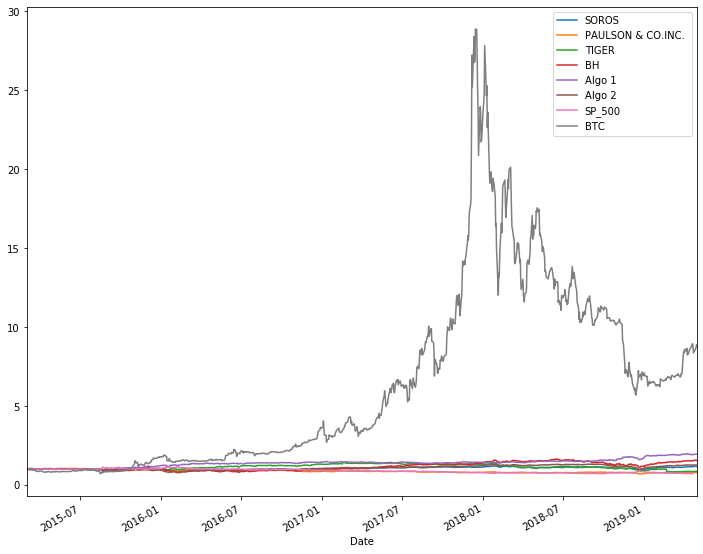

In [31]:
# Plot cumulative returns with Bitcoin
(returns_df3+1).cumprod().plot(figsize=[12,10])

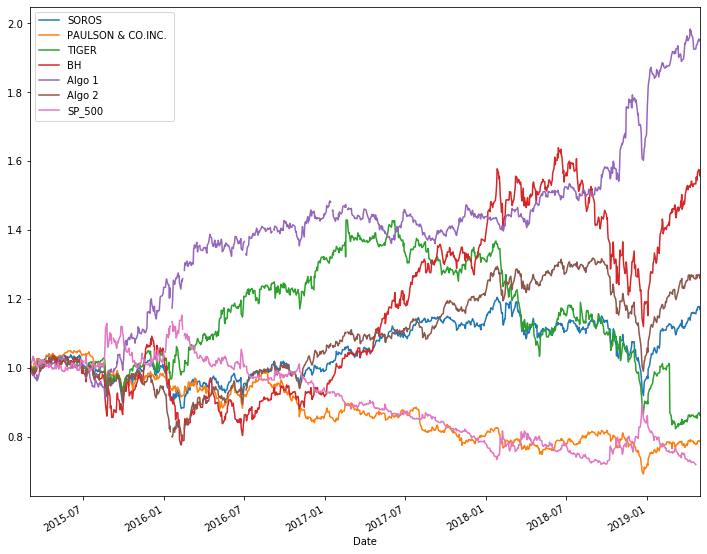

In [33]:
# Plot cumulative returns w/o Bitcoin
(returns_df2+1).cumprod().plot(figsize=[12,10])

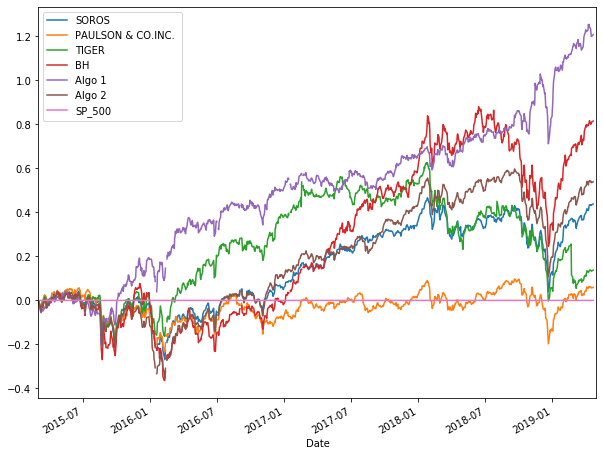

In [67]:
# Calculate alpha dataframe
# Alpha = return-benchmark_return'
cum_returns = (returns_df2+1).cumprod()
cum_returns.head()
alphas = cum_returns.sub([cum_returns['SP_500'],cum_returns['SP_500'],cum_returns['SP_500'],cum_returns['SP_500'],cum_returns['SP_500'],cum_returns['SP_500'], cum_returns['SP_500']]) 

alphas.plot(figsize=[10,8])

---

## Risk Performance

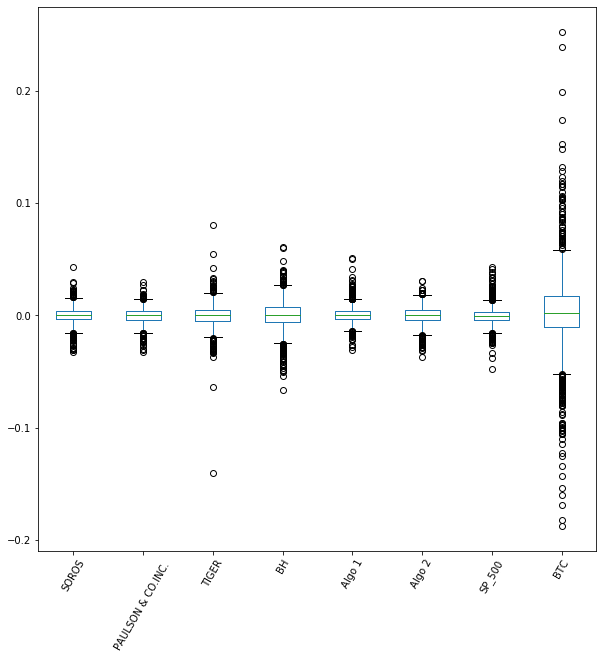

In [34]:
# Box plot to visually show risk
returns_df3.plot(kind="box", figsize=[10,10], rot=60)

In [35]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = returns_df3.std()
daily_std

SOROS                 0.007842
PAULSON & CO.INC.     0.006977
TIGER                 0.010824
BH                    0.012831
Algo 1                0.007601
Algo 2                0.008327
SP_500                0.008587
BTC                   0.039752
dtype: float64

Assuming we are using standard deviation as our measurement of risk, Tiger and Berkshire are riskier that the S&P 500.

In [38]:
# Determine which portfolios are riskier than the S&P 500
returns_df3.std() > returns_df2['SP_500'].std()

SOROS                 False
PAULSON & CO.INC.     False
TIGER                  True
BH                     True
Algo 1                False
Algo 2                False
SP_500                False
BTC                    True
dtype: bool

In [39]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS                 0.124487
PAULSON & CO.INC.     0.110754
TIGER                 0.171830
BH                    0.203682
Algo 1                0.120660
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for standard deviation and Beta. 

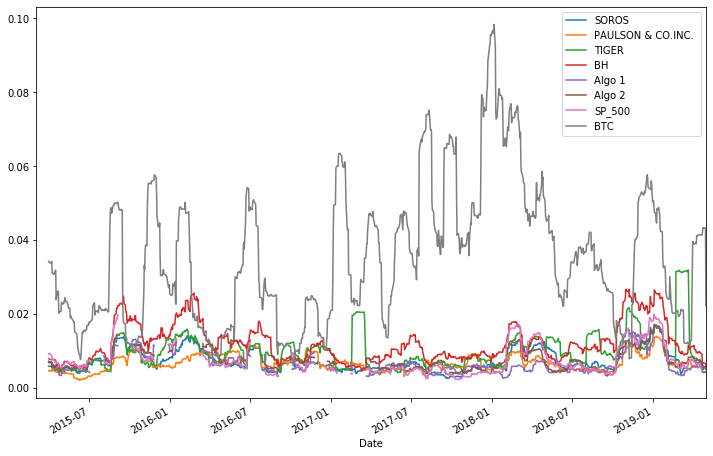

In [43]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
returns_df3.rolling(21).std().plot(figsize=[12,8])

In [42]:
# Construct a correlation table
corr = returns_df3.corr()
corr

,SOROS,PAULSON & CO.INC.,TIGER,BH,Algo 1,Algo 2,SP_500,BTC
SOROS,1.000000,0.700181,0.561745,0.754308,0.321366,0.826719,0.000574,0.037119
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.269257,0.677993,0.013549,0.063192
TIGER,0.561745,0.435333,1.000000,0.425102,0.164840,0.508139,-0.001505,0.010050
BH,0.754308,0.545802,0.425102,1.000000,0.292307,0.687717,-0.013856,0.056991
Algo 1,0.321366,0.269257,0.164840,0.292307,1.000000,0.288367,-0.033963,0.037819
Algo 2,0.826719,0.677993,0.508139,0.687717,0.288367,1.000000,-0.002192,0.036617
SP_500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,-0.046148
BTC,0.037119,0.063192,0.010050,0.056991,0.037819,0.036617,-0.046148,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A1CF38DC8>,
      dtype=object)

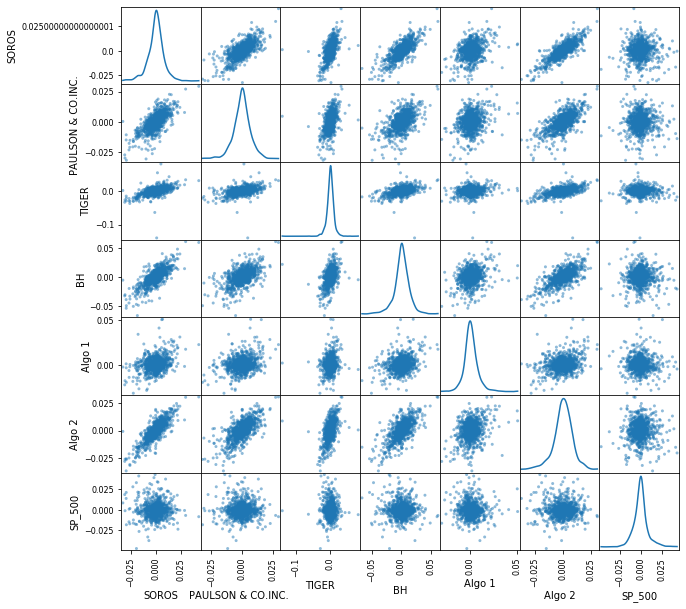

In [44]:
# KDE Analysis
pd.plotting.scatter_matrix(returns_df2, diagonal='kde', figsize=[10,10])

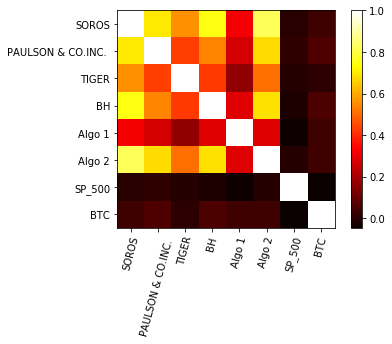

In [45]:
plt.imshow(corr,cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=75)
plt.yticks(range(len(corr)), corr.columns);

### Beta Calculation
covariance = Measure of a stock's return relative to that of the market
variance = Measure of how the market moves relative to its mean.

$Beta = \frac{covariance}{variance}$ 

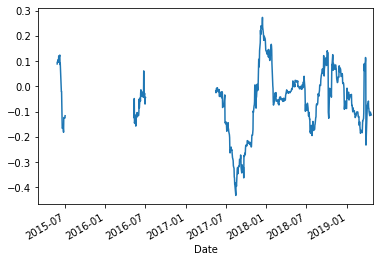

In [47]:
# Beta Calc
covariance = returns_df3['Algo 1'].rolling(60).cov(returns_df3['SP_500'])
variance = returns_df3['SP_500'].rolling(60).var()
beta = (covariance/variance)
beta.plot()

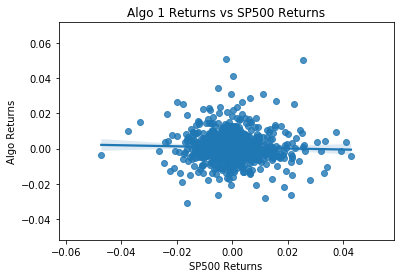

In [62]:
# Linear Regression... Added Analysis
benchmark_ret = returns_df2['SP_500']
port_return = returns_df3['Algo 1']

sns.regplot(benchmark_ret.values, port_return.values)
plt.xlabel("SP500 Returns")
plt.ylabel("Algo Returns")
plt.title("Algo 1 Returns vs SP500 Returns")
plt.show()

---

## Reward to Risk Performance

In [64]:
# Annualized Sharpe Ratios
# Calculate Sharpe Ratio
sharpe_ratios = (returns_df3.mean() * 252) / (returns_df2.std() * np.sqrt(252))
sharpe_ratios

Algo 1                1.388424
Algo 2                0.485438
BH                    0.619628
BTC                        NaN
PAULSON & CO.INC.    -0.462131
SOROS                 0.361568
SP_500               -0.518582
TIGER                -0.118257
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

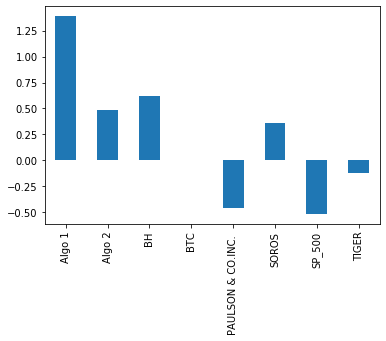

In [65]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

---

In [68]:
## Added Performance Metrics
import math
import numpy
import numpy.random as nrand

"""
Note - for some of the metrics the absolute value is returns. This is because if the risk (loss) is higher we want to
discount the expected excess return from the portfolio by a higher amount. Therefore risk should be positive.
"""


def vol(returns):
    # Return the standard deviation of returns
    return numpy.std(returns)


def beta(returns, market):
    # Create a matrix of [returns, market]
    m = numpy.matrix([returns, market])
    # Return the covariance of m divided by the standard deviation of the market returns
    return numpy.cov(m)[0][1] / numpy.std(market)


def lpm(returns, threshold, order):
    # This method returns a lower partial moment of the returns
    # Create an array he same length as returns containing the minimum return threshold
    threshold_array = numpy.empty(len(returns))
    threshold_array.fill(threshold)
    # Calculate the difference between the threshold and the returns
    diff = threshold_array - returns
    # Set the minimum of each to 0
    diff = diff.clip(min=0)
    # Return the sum of the different to the power of order
    return numpy.sum(diff ** order) / len(returns)


def hpm(returns, threshold, order):
    # This method returns a higher partial moment of the returns
    # Create an array he same length as returns containing the minimum return threshold
    threshold_array = numpy.empty(len(returns))
    threshold_array.fill(threshold)
    # Calculate the difference between the returns and the threshold
    diff = returns - threshold_array
    # Set the minimum of each to 0
    diff = diff.clip(min=0)
    # Return the sum of the different to the power of order
    return numpy.sum(diff ** order) / len(returns)


def var(returns, alpha):
    # This method calculates the historical simulation var of the returns
    sorted_returns = numpy.sort(returns)
    # Calculate the index associated with alpha
    index = int(alpha * len(sorted_returns))
    # VaR should be positive
    return abs(sorted_returns[index])


def cvar(returns, alpha):
    # This method calculates the condition VaR of the returns
    sorted_returns = numpy.sort(returns)
    # Calculate the index associated with alpha
    index = int(alpha * len(sorted_returns))
    # Calculate the total VaR beyond alpha
    sum_var = sorted_returns[0]
    for i in range(1, index):
        sum_var += sorted_returns[i]
    # Return the average VaR
    # CVaR should be positive
    return abs(sum_var / index)


def prices(returns, base):
    # Converts returns into prices
    s = [base]
    for i in range(len(returns)):
        s.append(base * (1 + returns[i]))
    return numpy.array(s)


def dd(returns, tau):
    # Returns the draw-down given time period tau
    values = prices(returns, 100)
    pos = len(values) - 1
    pre = pos - tau
    drawdown = float('+inf')
    # Find the maximum drawdown given tau
    while pre >= 0:
        dd_i = (values[pos] / values[pre]) - 1
        if dd_i < drawdown:
            drawdown = dd_i
        pos, pre = pos - 1, pre - 1
    # Drawdown should be positive
    return abs(drawdown)


def max_dd(returns):
    # Returns the maximum draw-down for any tau in (0, T) where T is the length of the return series
    max_drawdown = float('-inf')
    for i in range(0, len(returns)):
        drawdown_i = dd(returns, i)
        if drawdown_i > max_drawdown:
            max_drawdown = drawdown_i
    # Max draw-down should be positive
    return abs(max_drawdown)


def average_dd(returns, periods):
    # Returns the average maximum drawdown over n periods
    drawdowns = []
    for i in range(0, len(returns)):
        drawdown_i = dd(returns, i)
        drawdowns.append(drawdown_i)
    drawdowns = sorted(drawdowns)
    total_dd = abs(drawdowns[0])
    for i in range(1, periods):
        total_dd += abs(drawdowns[i])
    return total_dd / periods


def average_dd_squared(returns, periods):
    # Returns the average maximum drawdown squared over n periods
    drawdowns = []
    for i in range(0, len(returns)):
        drawdown_i = math.pow(dd(returns, i), 2.0)
        drawdowns.append(drawdown_i)
    drawdowns = sorted(drawdowns)
    total_dd = abs(drawdowns[0])
    for i in range(1, periods):
        total_dd += abs(drawdowns[i])
    return total_dd / periods


def treynor_ratio(er, returns, market, rf):
    return (er - rf) / beta(returns, market)


def sharpe_ratio(er, returns, rf):
    return (er - rf) / vol(returns)


def information_ratio(returns, benchmark):
    diff = returns - benchmark
    return numpy.mean(diff) / vol(diff)


def modigliani_ratio(er, returns, benchmark, rf):
    np_rf = numpy.empty(len(returns))
    np_rf.fill(rf)
    rdiff = returns - np_rf
    bdiff = benchmark - np_rf
    return (er - rf) * (vol(rdiff) / vol(bdiff)) + rf


def excess_var(er, returns, rf, alpha):
    return (er - rf) / var(returns, alpha)


def conditional_sharpe_ratio(er, returns, rf, alpha):
    return (er - rf) / cvar(returns, alpha)


def omega_ratio(er, returns, rf, target=0):
    return (er - rf) / lpm(returns, target, 1)


def sortino_ratio(er, returns, rf, target=0):
    return (er - rf) / math.sqrt(lpm(returns, target, 2))


def kappa_three_ratio(er, returns, rf, target=0):
    return (er - rf) / math.pow(lpm(returns, target, 3), float(1/3))


def gain_loss_ratio(returns, target=0):
    return hpm(returns, target, 1) / lpm(returns, target, 1)


def upside_potential_ratio(returns, target=0):
    return hpm(returns, target, 1) / math.sqrt(lpm(returns, target, 2))


def calmar_ratio(er, returns, rf):
    return (er - rf) / max_dd(returns)


def sterling_ration(er, returns, rf, periods):
    return (er - rf) / average_dd(returns, periods)


def burke_ratio(er, returns, rf, periods):
    return (er - rf) / math.sqrt(average_dd_squared(returns, periods))


def test_risk_metrics():
    # This is just a testing method
    r = nrand.uniform(-1, 1, 50)
    m = nrand.uniform(-1, 1, 50)
    print("vol =", vol(r))
    print("beta =", beta(r, m))
    print("hpm(0.0)_1 =", hpm(r, 0.0, 1))
    print("lpm(0.0)_1 =", lpm(r, 0.0, 1))
    print("VaR(0.05) =", var(r, 0.05))
    print("CVaR(0.05) =", cvar(r, 0.05))
    print("Drawdown(5) =", dd(r, 5))
    print("Max Drawdown =", max_dd(r))


def test_risk_adjusted_metrics():
    # Returns from the portfolio (r) and market (m)
    r = nrand.uniform(-1, 1, 50)
    m = nrand.uniform(-1, 1, 50)
    # Expected return
    e = numpy.mean(r)
    # Risk free rate
    f = 0.06
    # Risk-adjusted return based on Volatility
    print("Treynor Ratio =", treynor_ratio(e, r, m, f))
    print("Sharpe Ratio =", sharpe_ratio(e, r, f))
    print("Information Ratio =", information_ratio(r, m))
    # Risk-adjusted return based on Value at Risk
    print("Excess VaR =", excess_var(e, r, f, 0.05))
    print("Conditional Sharpe Ratio =", conditional_sharpe_ratio(e, r, f, 0.05))
    # Risk-adjusted return based on Lower Partial Moments
    print("Omega Ratio =", omega_ratio(e, r, f))
    print("Sortino Ratio =", sortino_ratio(e, r, f))
    print("Kappa 3 Ratio =", kappa_three_ratio(e, r, f))
    print("Gain Loss Ratio =", gain_loss_ratio(r))
    print("Upside Potential Ratio =", upside_potential_ratio(r))
    # Risk-adjusted return based on Drawdown risk
    print("Calmar Ratio =", calmar_ratio(e, r, f))
    print("Sterling Ratio =", sterling_ration(e, r, f, 5))
    print("Burke Ratio =", burke_ratio(e, r, f, 5))


if __name__ == "__main__":
    test_risk_metrics()
    test_risk_adjusted_metrics()

vol = 0.5487384963376535
beta = -0.022163609027461804
hpm(0.0)_1 = 0.20871501475581325
lpm(0.0)_1 = 0.2566013579632919
VaR(0.05) = 0.9388233067320837
CVaR(0.05) = 0.9579218488340436
Drawdown(5) = 0.9769073434369036
Max Drawdown = 0.9829672842403671
Treynor Ratio = 2.2592915763140273
Sharpe Ratio = -0.13549994006914692
Information Ratio = -0.01167352692581321
Excess VaR = -0.09022703036391429
Conditional Sharpe Ratio = -0.08838254698040425
Omega Ratio = -0.3008683477634692
Sortino Ratio = -0.19099803137409338
Kappa 3 Ratio = -0.15781687175300602
Gain Loss Ratio = 0.9175074141903796
Upside Potential Ratio = 0.5824544561904724
Calmar Ratio = -0.08543931708029318
Sterling Ratio = -0.21659880727150752
Burke Ratio = -0.18195712191327562


[risk_calcs](http://www.turingfinance.com/computational-investing-with-python-week-one/)